In [6]:
# Basic modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import PIL


# Preprocessing
from tensorflow.keras.preprocessing import image

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Modeling modules
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Pretrained models 
from keras.applications.mobilenet import preprocess_input, MobileNet, decode_predictions


In [2]:
# Generate image class names based on directory's name.
labels = sorted(os.listdir('plant_images/train'))
print(labels)

['.DS_Store', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [3]:
# create function to view random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+ "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_folder)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image shape: (256, 256, 3)


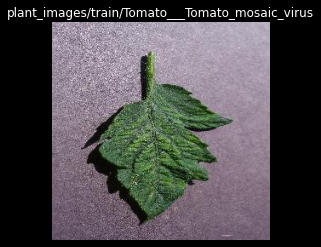

In [4]:
# view random image
img = view_random_image(target_dir= 'plant_images/train/', target_class='Tomato___Tomato_mosaic_virus')

In [9]:
# preprocess data 
train_dir = 'plant_images/train'
test_dir = 'plant_images/test'
datagen = ImageDataGenerator(rescale = 1. / 255.0)

# Set train data 
train_data = datagen.flow_from_directory(
    train_dir, batch_size =32,shuffle=False, target_size = (256,256), class_mode = 'categorical'
)

# Set validation data
valid_data = datagen.flow_from_directory(
    test_dir, batch_size =32,shuffle=False, target_size = (256,256), class_mode = 'categorical'
)


Found 113420 images belonging to 29 classes.
Found 28312 images belonging to 29 classes.


In [10]:
# Create model architecture with Sequential API
model = Sequential()
model.add(Conv2D(16,3, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32,3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

In [11]:
# Compile data and set configuration for model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
# Create early stop callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [9]:
# Train data 
history = model.fit(train_data, epochs=15, validation_data = valid_data, callbacks=[early_stop])

2021-12-28 16:13:36.118956: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-28 16:13:36.244618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/15
3545/3545 [==============================] - ETA: 0s - loss: 2.8838 - accuracy: 0.2216

2021-12-28 16:22:25.461658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3545/3545 [==============================] - 595s 168ms/step - loss: 2.8838 - accuracy: 0.2216 - val_loss: 2.4467 - val_accuracy: 0.2984
Epoch 2/15
3545/3545 [==============================] - 1099s 310ms/step - loss: 2.0621 - accuracy: 0.4054 - val_loss: 1.3553 - val_accuracy: 0.5985
Epoch 3/15
3545/3545 [==============================] - 1111s 314ms/step - loss: 1.4924 - accuracy: 0.5482 - val_loss: 0.9488 - val_accuracy: 0.6862
Epoch 4/15
3545/3545 [==============================] - 1082s 305ms/step - loss: 1.1563 - accuracy: 0.6359 - val_loss: 0.7108 - val_accuracy: 0.7690
Epoch 5/15
3545/3545 [==============================] - 991s 280ms/step - loss: 0.9582 - accuracy: 0.6939 - val_loss: 0.5877 - val_accuracy: 0.8156
Epoch 6/15
3545/3545 [==============================] - 1036s 292ms/step - loss: 0.8238 - accuracy: 0.7343 - val_loss: 0.4560 - val_accuracy: 0.8481
Epoch 7/15
3545/3545 [==============================] - 1056s 298ms/step - loss: 0.7015 - accuracy: 0.7694 - val_loss: 

In [10]:
model.evaluate(valid_data)

885/885 [==============================] - 91s 102ms/step - loss: 0.2522 - accuracy: 0.9211


[0.25217849016189575, 0.9210935831069946]

In [11]:
# Create function plotting for model tracking
def plot_model_eval(data):
    pd.DataFrame(data.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

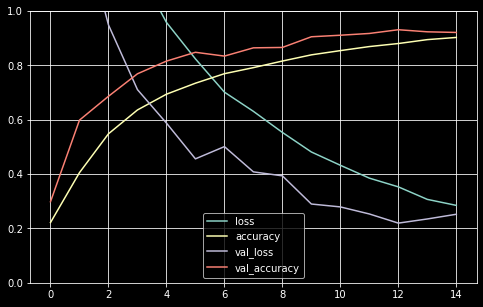

In [12]:
plot_model_eval(history)

In [20]:
# Save model
model.save("my_model.h5")

In [13]:
model = load_model('my_model.h5')

In [19]:
# Train more epoch
history = model.fit(train_data, epochs=5, validation_data = valid_data, callbacks=[early_stop])

Epoch 1/5
3545/3545 [==============================] - 1035s 292ms/step - loss: 0.0757 - accuracy: 0.9721 - val_loss: 0.2296 - val_accuracy: 0.9504
Epoch 2/5
3545/3545 [==============================] - 1314s 371ms/step - loss: 0.0733 - accuracy: 0.9735 - val_loss: 0.2062 - val_accuracy: 0.9522
Epoch 3/5
3545/3545 [==============================] - 1292s 364ms/step - loss: 0.0741 - accuracy: 0.9733 - val_loss: 0.2055 - val_accuracy: 0.9491
Epoch 4/5
3545/3545 [==============================] - 1354s 382ms/step - loss: 0.0744 - accuracy: 0.9731 - val_loss: 0.2138 - val_accuracy: 0.9509
Epoch 5/5
3545/3545 [==============================] - 1361s 384ms/step - loss: 0.0715 - accuracy: 0.9747 - val_loss: 0.2244 - val_accuracy: 0.9521


In [13]:
# Create function for prepared image 
def prepare_image(file, isPretrained, size):
    img= image.load_img(file, target_size=size)
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    if isPretrained:
        return preprocess_input(img_batch)
    else:
        return img_batch/255

In [14]:
# Predict new image 
pred = model.predict(prepare_image('plant_images/test/Strawberry___Leaf_scorch/0a08af15-adfe-447c-8ed4-17ed2702d810___RS_L.Scorch 0054_90degFlipLR.JPG', False,(256,256)))
pred.argmax()

2021-12-28 20:30:34.632366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17

In [15]:
# Predict validation data
predictions = model.predict_generator(valid_data)
predicted_classes = np.argmax(predictions, axis=1)
# Get true classes and predicted classes 
true_classes = valid_data.classes 
class_labels = list(valid_data.class_indices.keys())

/Users/nurfiahidris/miniforge3/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2021-12-28 20:30:34.985796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [16]:
# Get class names with indices 
train_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Corn_(maize)___Common_rust_': 5,
 'Corn_(maize)___Northern_Leaf_Blight': 6,
 'Corn_(maize)___healthy': 7,
 'Grape___Black_rot': 8,
 'Grape___Esca_(Black_Measles)': 9,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 10,
 'Grape___healthy': 11,
 'Pepper,_bell___Bacterial_spot': 12,
 'Pepper,_bell___healthy': 13,
 'Potato___Early_blight': 14,
 'Potato___Late_blight': 15,
 'Potato___healthy': 16,
 'Strawberry___Leaf_scorch': 17,
 'Strawberry___healthy': 18,
 'Tomato___Bacterial_spot': 19,
 'Tomato___Early_blight': 20,
 'Tomato___Late_blight': 21,
 'Tomato___Leaf_Mold': 22,
 'Tomato___Septoria_leaf_spot': 23,
 'Tomato___Spider_mites Two-spotted_spider_mite': 24,
 'Tomato___Target_Spot': 25,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 26,
 'Tomato___Tomato_mosaic_virus': 27,
 'Tomato___healthy': 28}

In [17]:
report = classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.73      0.81       504
                                 Apple___Black_rot       0.89      0.95      0.92       496
                          Apple___Cedar_apple_rust       0.86      0.96      0.91       220
                                   Apple___healthy       0.94      0.95      0.95      1316
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.79      0.77      0.78       408
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       952
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.89      0.88       788
                            Corn_(maize)___healthy       0.99      1.00      1.00       928
                                 Grape___Black_rot       0.85      0.94      0.89       944
                      Grape___Esca_(Black_Measles)       0.95      0.92      0.

Text(0.5, 1.0, 'Confusion Matrix')

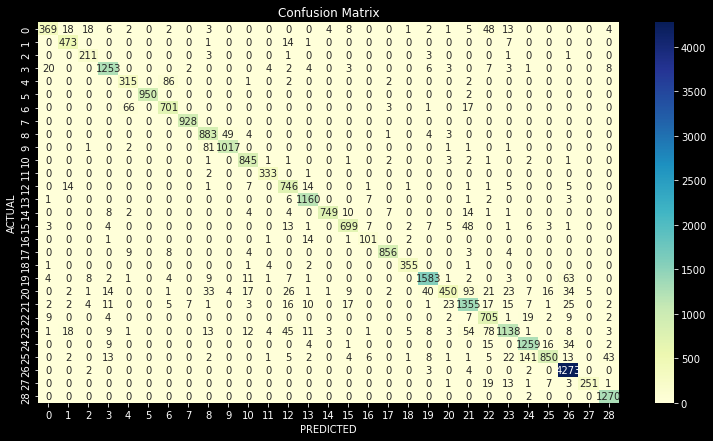

In [18]:
# Display confusion_matrix
fig, ax = plt.subplots(figsize=(13,7))
sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.set_xlabel('PREDICTED')
ax.set_ylabel('ACTUAL')
ax.set_title('Confusion Matrix')

### PRETRAINED MODEL

PRETRAINED 

In [25]:
# Defined pretrained model
base_model = MobileNet(input_shape=(224,224,3), weights = 'imagenet',include_top=True, classifier_activation='softmax')

In [55]:
base_model = Sequential()

In [56]:
base_model.add(MobileNet(input_shape=(224,224,3), weights = 'imagenet',include_top=True, classifier_activation='softmax'))
base_model.add(Dense(64,activation = 'relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(29, activation='softmax'))

In [58]:
# Compile data and set configuration for model
base_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Create early stop callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)
# Train data 
history = base_model.fit(train_data, epochs=5, validation_data = valid_data, callbacks=[early_stop])

Epoch 1/5


2021-12-29 21:22:29.550960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3545/3545 [==============================] - ETA: 0s - loss: 3.2105 - accuracy: 0.1500

2021-12-29 22:46:54.546769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3545/3545 [==============================] - 5418s 2s/step - loss: 3.2105 - accuracy: 0.1500 - val_loss: 3.1590 - val_accuracy: 0.1513
Epoch 2/5
 153/3545 [>.............................] - ETA: 1:11:06 - loss: 3.1436 - accuracy: 0.1503

KeyboardInterrupt: 

In [47]:
# Preprocess image for prediction 
preprocessed_image = prepare_image('/Users/nurfiahidris/Downloads/220px-Mycosphaerella_fragariae.jpeg', True,(224,224))

In [48]:
y_pred = base_model.predict(preprocessed_image)
y_pred.argmax()

939

In [49]:
print('Predicted:', decode_predictions(y_pred, top=3))

Predicted: [[('n07716358', 'zucchini', 0.40893278), ('n07718472', 'cucumber', 0.14014177), ('n07730033', 'cardoon', 0.084995575)]]


In [26]:
base_model